<a href="https://colab.research.google.com/github/Luke-zm/ev_charge_ana/blob/za/ZHOUANG_time_period_electricity_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary packages for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import datetime for datetime processing
from datetime import datetime, timedelta

In [2]:
# Import the CSV file to work with
url = "https://raw.githubusercontent.com/Luke-zm/ev_charge_ana/main/pre_ana_data/updated_combined_ev_charging_data.csv"
leeds_comb_df = pd.read_csv(url)
leeds_comb_df.head()

,charging_event_id,user_id,cp_id,con_num,start_date,start_time,end_date,end_time,total_kwh,site,charger_model,charging_cost,start_datetime,end_datetime,duration_hr,start_day,end_day,start_period,end_period
0,383322,14Q3User 31,70206,2,31/12/2014,11:25,31/12/2014,11:35,0.57,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-31 11:25:00,2014-12-31 11:35:00,0.166667,Wednesday,Wednesday,morning,morning
1,383031,14Q3User 635,70206,1,30/12/2014,13:58,30/12/2014,15:24,4.52,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-30 13:58:00,2014-12-30 15:24:00,1.433333,Tuesday,Tuesday,afternoon,afternoon
2,381777,14Q3User 38,70201,2,27/12/2014,18:13,27/12/2014,19:08,0.00,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN,2014-12-27 18:13:00,2014-12-27 19:08:00,0.916667,Saturday,Saturday,evening,evening
3,380951,14Q3User 629,70208,1,24/12/2014,11:37,24/12/2014,12:06,3.16,Elland Road Park and Ride,APT 7kW Dual Outlet,NaN,2014-12-24 11:37:00,2014-12-24 12:06:00,0.483333,Wednesday,Wednesday,morning,afternoon
4,377470,14Q3User 626,70204,2,18/12/2014,09:29,18/12/2014,11:56,3.16,Woodhouse Lane Car Park,APT 7kW Dual Outlet,NaN,2014-12-18 09:29:00,2014-12-18 11:56:00,2.450000,Thursday,Thursday,morning,morning


In [3]:
leeds_comb_df["start_period"].unique()

array(['morning', 'afternoon', 'evening', 'early morning'], dtype=object)

In [4]:
leeds_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   charging_event_id  24224 non-null  int64  
 1   user_id            24224 non-null  object 
 2   cp_id              24224 non-null  int64  
 3   con_num            24224 non-null  int64  
 4   start_date         24224 non-null  object 
 5   start_time         24224 non-null  object 
 6   end_date           23927 non-null  object 
 7   end_time           23927 non-null  object 
 8   total_kwh          23927 non-null  float64
 9   site               24224 non-null  object 
 10  charger_model      24224 non-null  object 
 11  charging_cost      2278 non-null   float64
 12  start_datetime     24224 non-null  object 
 13  end_datetime       23927 non-null  object 
 14  duration_hr        23927 non-null  float64
 15  start_day          24224 non-null  object 
 16  end_day            239

Extract proper data for analysis

In [6]:
data=leeds_comb_df
# Only save start_datetime < end_datetime, which are real chargings
data = data[data['site'] != "***TEST SITE*** Charge Your Car HQ"]
# Delete test site data
data = data[data['start_datetime'] < data['end_datetime']]


In [7]:

# Group by datetime_period and sum kwh
period_data = data.groupby('start_period').sum()['total_kwh'].reset_index()

#data = result[['datetime_period', 'kwh']]

print(period_data.head())


    start_period   total_kwh
0      afternoon   81924.348
1  early morning     798.161
2        evening   62363.515
3        morning  120191.697


<ipython-input-7-534952610537>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  period_data = data.groupby('start_period').sum()['total_kwh'].reset_index()


<ipython-input-11-a348502fd9a9>:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  group.loc[:, 'start_day'] = pd.Categorical(group['start_day'], categories=week_order, ordered=True)
<ipython-input-11-a348502fd9a9>:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  group.loc[:, 'start_day'] = pd.Categorical(group['start_day'], categories=week_order, ordered=True)
<ipython-input-11-a348502fd9a9>:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. T

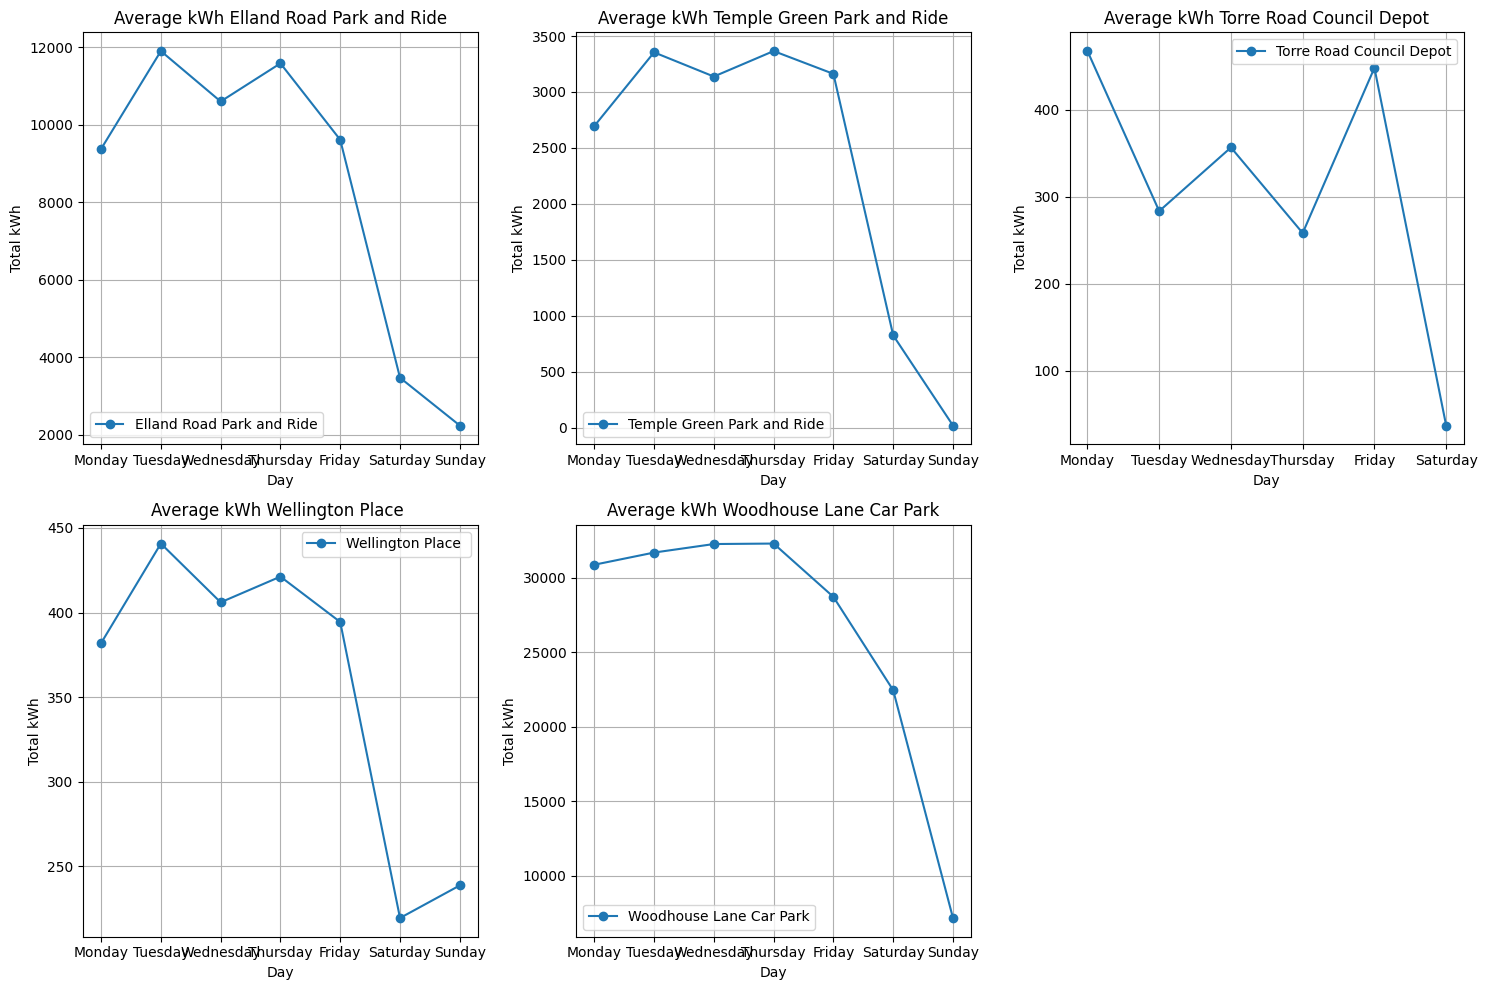

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by site and start_day, then calculate the total electricity consumption per day
daily_totals = data.groupby(['site', 'start_day']).sum(numeric_only=True).reset_index()

# Calculate the average daily electricity consumption for each site
daily_averages = daily_totals.groupby(['site', 'start_day']).mean().reset_index()

# Define order for a week
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Get unique sites
sites = daily_averages['site'].unique()

# Plot
cols = 3
rows = 2
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))
axs = axs.flatten()

for i, site in enumerate(sites):
    ax = axs[i]
    group = daily_averages[daily_averages['site'] == site].copy()
    group.loc[:, 'start_day'] = pd.Categorical(group['start_day'], categories=week_order, ordered=True)
    group.sort_values('start_day', inplace=True)

    ax.plot(group['start_day'], group['total_kwh'], label=site, marker='o')
    ax.set_title(f'Average kWh {site}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Total kWh')
    ax.legend()
    ax.grid(True)

# Hide blank figure
for j in range(len(sites), rows * cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()



Analysis on only WLCP：


<ipython-input-12-e65744afc975>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WLCP_data['start_time'] = pd.to_datetime(WLCP_data['start_time'])
<ipython-input-12-e65744afc975>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WLCP_data['end_time'] = pd.to_datetime(WLCP_data['end_time'])


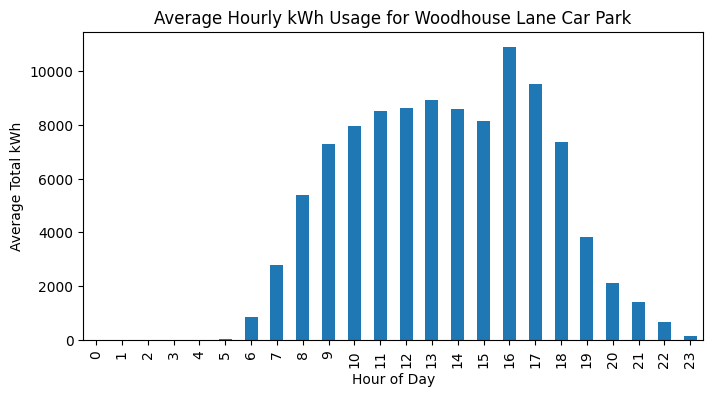

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

WLCP_data = data[data['site'] == 'Woodhouse Lane Car Park']

# Change to type datetime
WLCP_data['start_time'] = pd.to_datetime(WLCP_data['start_time'])
WLCP_data['end_time'] = pd.to_datetime(WLCP_data['end_time'])

# Store electricity consumption for each date and time period
daily_hourly_kwh = pd.DataFrame()

# Go through every unique dates
for date in WLCP_data['start_time'].dt.date.unique():
    daily_data = WLCP_data[WLCP_data['start_time'].dt.date == date]

    # Create a DataFrame to accumulate total kWh for each hour period today
    hourly_kwh = pd.DataFrame(0, index=np.arange(24), columns=[date])

    # Go through each record and allocate kWh
    for _, row in daily_data.iterrows():
        start_hour = row['start_time'].hour
        end_hour = row['end_time'].hour
        total_hours = max((row['end_time'] - row['start_time']).seconds / 3600, 1)  # Define the hour
        kwh_per_hour = row['total_kwh'] / total_hours  # Average hour kWh

        # Allocate kWh to its hour period
        for hour in range(start_hour, end_hour + 1):
            hourly_kwh.loc[hour, date] += kwh_per_hour

    # Concate data
    daily_hourly_kwh = pd.concat([daily_hourly_kwh, hourly_kwh], axis=1)

# Calculate average kwh for different days
average_hourly_kwh = daily_hourly_kwh.mean(axis=1)

# Plot
average_hourly_kwh.plot(kind='bar', figsize=(8, 4), title='Average Hourly kWh Usage for Woodhouse Lane Car Park')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total kWh')
plt.show()


Use similar method to calculate kwh over a week

<ipython-input-14-d4ece268791c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WLCP_data.loc[:, 'start_time'] = pd.to_datetime(WLCP_data['start_time'])
<ipython-input-14-d4ece268791c>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  WLCP_data.loc[:, 'start_time'] = pd.to_datetime(WLCP_data['start_time'])
<ipython-input-14-d4ece268791c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

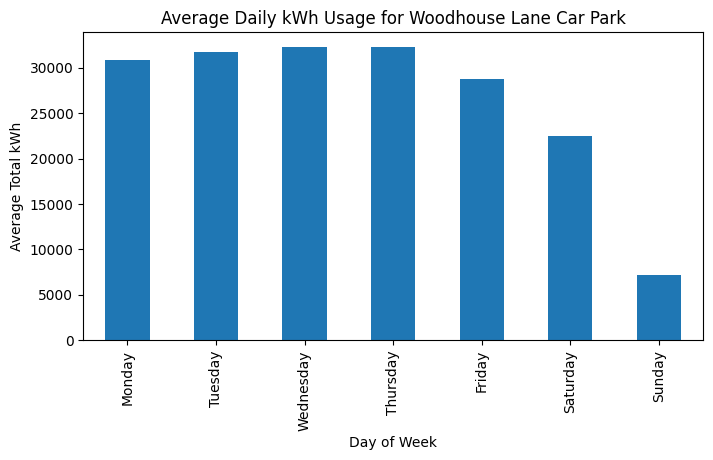

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Change to type datetime
WLCP_data.loc[:, 'start_time'] = pd.to_datetime(WLCP_data['start_time'])
WLCP_data.loc[:, 'end_time'] = pd.to_datetime(WLCP_data['end_time'])

# Store electricity consumption for each day
daily_kwh = pd.DataFrame()

# Go through each day
for day in WLCP_data['start_day'].unique():
    daily_data = WLCP_data[WLCP_data['start_day'] == day]

    # Today total kwh
    total_daily_kwh = daily_data['total_kwh'].sum()
    daily_kwh = pd.concat([daily_kwh, pd.DataFrame({'Day': [day], 'Total_kWh': [total_daily_kwh]})], ignore_index=True)

# Average kwh for day
average_daily_kwh = daily_kwh.groupby('Day')['Total_kWh'].mean()

# Order days in a week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_daily_kwh = average_daily_kwh.reindex(days_order)

# PLot
average_daily_kwh.plot(kind='bar', figsize=(8, 4), title='Average Daily kWh Usage for Woodhouse Lane Car Park')
plt.xlabel('Day of Week')
plt.ylabel('Average Total kWh')
plt.show()


In [15]:
# Extract total kWh for everyday
daily_kwh = WLCP_data.groupby('start_date')['total_kwh'].sum().reset_index()
daily_kwh.columns = ['Date', 'Total_kWh']

daily_kwh.set_index('Date', inplace=True)


# Change time format
daily_kwh.index = pd.to_datetime(daily_kwh.index, format='%d/%m/%Y')

# Sort by date
daily_kwh = daily_kwh.sort_index()


In [16]:
daily_kwh.head()

,Total_kWh
Date,
2014-04-10,5.63
2014-04-12,5.39
2014-04-18,4.70
2014-05-10,1.26
2014-05-12,5.70


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

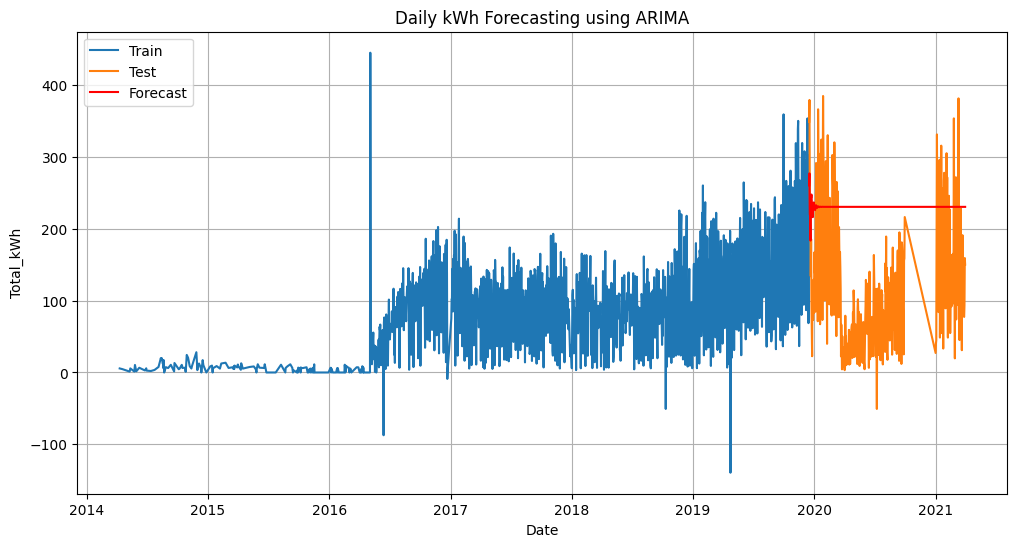

In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Split train and train set
train_size = int(len(daily_kwh) * 0.8)
train, test = daily_kwh[0:train_size], daily_kwh[train_size:len(daily_kwh)]

# Use ARIMA model
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Predict
forecast = model_fit.forecast(steps=len(test))

# Plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Total_kWh'], label='Train')
plt.plot(test.index, test['Total_kWh'], label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Daily kWh Forecasting using ARIMA')
plt.xlabel('Date')
plt.ylabel('Total_kWh')
plt.grid(True)
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

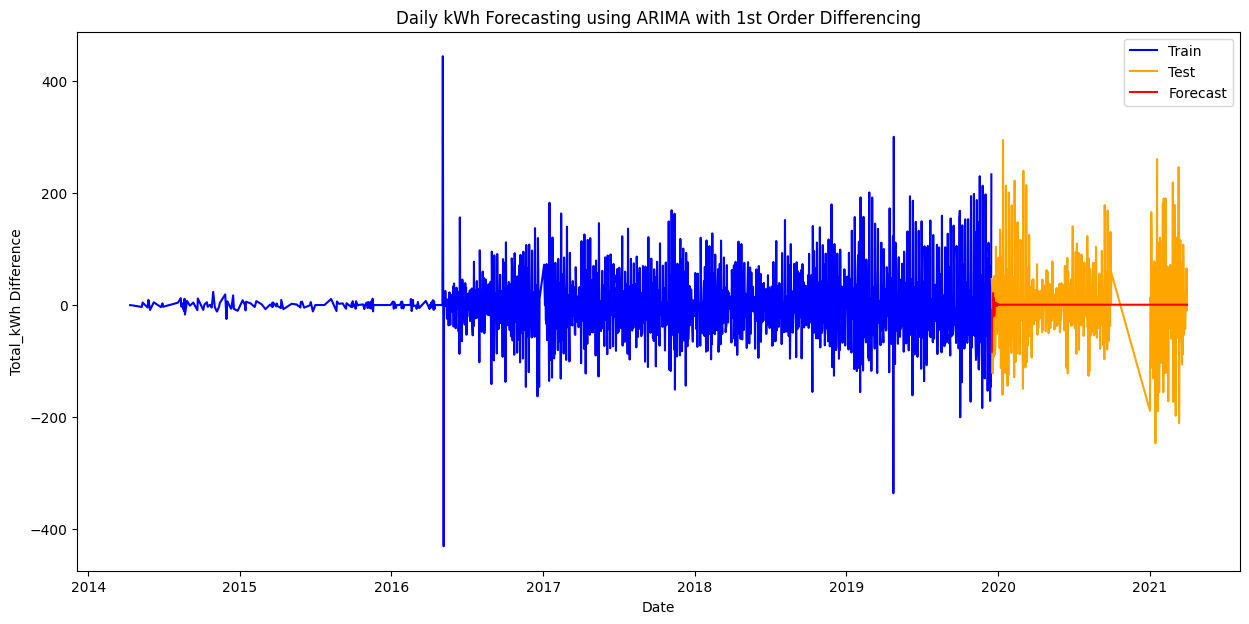

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define first difference
diff = daily_kwh['Total_kWh'].diff().dropna()

# Split train and test set
train_diff = diff[:int(0.8*len(diff))]
test_diff = diff[int(0.8*len(diff)):]

# ARIMA
model_diff = ARIMA(train_diff, order=(5,1,0))
model_fit_diff = model_diff.fit()

forecast_diff = model_fit_diff.forecast(steps=len(test_diff))

# Plot
plt.figure(figsize=(15,7))
plt.plot(train_diff, label='Train', color='blue')
plt.plot(test_diff.index, test_diff, label='Test', color='orange')
plt.plot(test_diff.index, forecast_diff, label='Forecast', color='red')
plt.title('Daily kWh Forecasting using ARIMA with 1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Total_kWh Difference')
plt.legend()
plt.show()


Try to find reason for bad performance

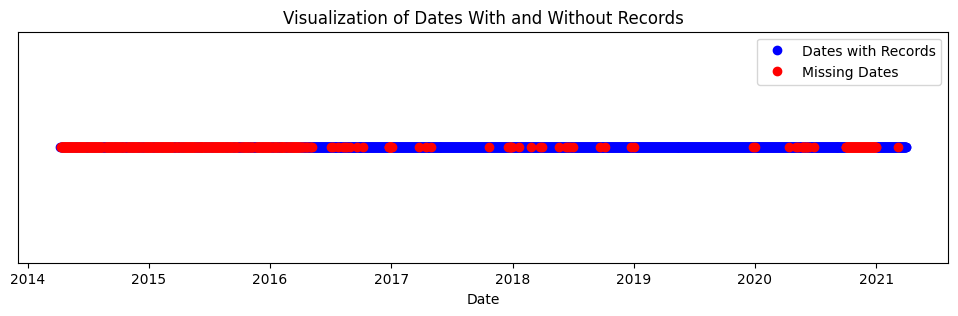

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define time line
full_date_range = pd.date_range(start=daily_kwh.index.min(), end=daily_kwh.index.max())

daily_kwh_with_na = daily_kwh.reindex(full_date_range)

# Visualize date with and without records
missing_dates = daily_kwh_with_na[daily_kwh_with_na['Total_kWh'].isna()].index
present_dates = daily_kwh_with_na[daily_kwh_with_na['Total_kWh'].notna()].index

plt.figure(figsize=(12,3))
plt.plot(present_dates, np.ones_like(present_dates), 'bo', label='Dates with Records')
plt.plot(missing_dates, np.ones_like(missing_dates), 'ro', label='Missing Dates')
plt.title('Visualization of Dates With and Without Records')
plt.yticks([])
plt.xlabel('Date')
plt.legend()
plt.show()
